# Simple Hypothesis Tests

Let's suppose we have a simple experimental setup that counts the number of charged particles, say electrons from a beam passing through a spark chamber. Say we can tune the beam to fire a fixed number of electrons at the chamber, and record the number of sparks $k$. When we ordered the detector, the manufacturer said it was 90\% efficient. So we set out to test our null hypothesis corresponding to $\epsilon=70\%$ hypothesis. Our test statistic will be $k$, and our critical region will correspond to values of $k\leq K$, where $K$ is the number satisfying, 

$$
    \sum_{k=0}^{k=K} b(k;\epsilon,N),
$$

where $b(k;p,N)$ the our binomial probability distribution with success probability $\epsilon$ and $N$ trials. 

Suppose we run our experiment with 5000 electrons and observe 3420 sparks. Given this observation, we can rewrite our definition of the *size* of our test,

$$
     P(X\in w|H_{0})=\alpha \rightarrow P(k>K |H_{0}) = \alpha
$$

where now we're calculating the value of $\alpha$ where $K$ is our observation. 

Instead of choosing $K$ such that $\alpha=0.05$, we let $K=83$ and compare the resulting value of $\alpha$ with 0.05. This is what is known as calculating a $p$-value (or tail probability) for a particular observation. We can calculate this numerically using a MC method - remember that convergence in probability requires a lot of MC. 


In [1]:
import numpy as np
# parameters of the binomial probability distribution
N, eps=5000,0.70
# our observed number of sparks
K=3420

# generate MC pseudo observations
nMC=10000
random_k = np.random.binomial(N,eps,nMC)

# count the fraction of times we see a value of k
# less than or equal to K
pval = float(len([x for x in random_k if x<=K]))/nMC
print(pval)

0.0074


In this case the $p$-value is smaller than 0.05 so based on this test we reject $H_0$. Using this procedure, how often would we see a $p$-value smaller than 0.05? 

We can use Monte Carlo simulations to calculate it, but this time, we will use `binom` from the `scipy.stats` package to do it since its much faster.

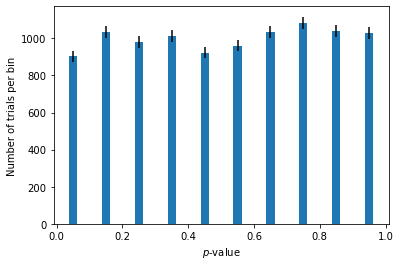

In [3]:
import matplotlib.pyplot as plt

# scipy has a lot of common pdfs for us to use
from scipy.stats import binom

# parameters of the binomial probability distribution
N, eps=5000,0.70

def calc_pval(K):
  # for a random observation K, we calculate the p-val
  pval = binom.cdf(K,N,eps)
  return pval

# calculate the p-valye for 10,000 MC samples (random values of K)
nTests=10000
tests = [np.random.binomial(N,eps) for i in range(nTests)]
pvals = [calc_pval(k) for k in tests]

y,binEdges = np.histogram(pvals,bins=10)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
menStd     = np.sqrt(y)
plt.bar(bincenters, y, width=0.025, yerr=menStd)
plt.xlabel("$p$-value")
plt.ylabel("Number of trials per bin")
plt.show()

You can see it's roughly flat. Actually this is not surprising since the distribution of the $p$-value under the null hypothesis is always flat!

Immediately we can see then that by choosing to reject $H_0$ when the $p$-value is  exactly the probability that we would falsely reject $H_0$; the $p$-value is our type-I error.